In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

In [23]:
data = pd.read_excel('../../data/final_subset_studium_german.xlsx')
cleanedData = data[data['Studium_Label'].notnull()]
cleanedData["Studium"] = cleanedData["Studium"].astype(str)
cleanedData.head()

/var/folders/vr/hb099htx7sbglwdnz8y2_ykh0000gp/T/ipykernel_57495/2423689109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedData["Studium"] = cleanedData["Studium"].astype(str)


,Unnamed: 0,Studium,Studium_Label,Studium_Comment
0,0,Die Vorlesungszeit war von Anfang September bi...,neutral,"pos:\nVielzahl an Kursen, praxisnäher, Sprachn..."
1,1,Die Pazmany Universität ist sehr klein im Verg...,positive,pos:\nsehr klein was ich schön und angenehm fa...
2,2,Mit der Universität selbst hatten wir wenig zu...,neutral,neg:\nkaum Zeit zu arbeiten\n\npos: alles ist ...
3,3,Da die Vorlesungen wegen der Pandemie online s...,positive,"pos:\nnette Mensa, großes Kursangebot, leichte..."
4,4,Die City University of Hong Kong hat eine groß...,negative,"neg: \nhoher Workload, Bewertung intransparent..."


In [36]:
X_clean = cleanedData['Studium']
y_clean = cleanedData['Studium_Label']

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

dummy_clf_clean = DummyClassifier(strategy="uniform")

dummy_clf_clean.fit(X_train_clean, y_train_clean)

y_pred_clean = dummy_clf_clean.predict(X_test_clean)


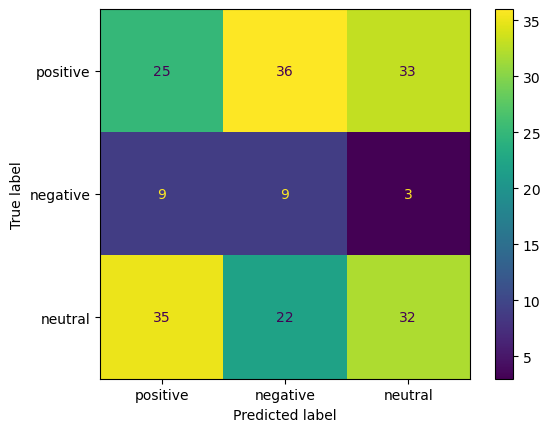

0.3235294117647059
              precision    recall  f1-score   support

    positive       0.13      0.43      0.20        21
    negative       0.47      0.36      0.41        89
     neutral       0.36      0.27      0.31        94

    accuracy                           0.32       204
   macro avg       0.32      0.35      0.31       204
weighted avg       0.39      0.32      0.34       204



In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report
import matplotlib.pyplot as plt
confusion_mat = confusion_matrix(y_test_clean, y_pred_clean, labels=['positive', 'negative', 'neutral'])

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['positive', 'negative', 'neutral'])
disp.plot()
plt.show()
print(f1_score(y_test_clean, y_pred_clean, labels=['positive', 'negative', 'neutral'], average='micro'))
print(classification_report(
    y_test_clean, y_pred_clean,
    output_dict=False,
    target_names=['positive', 'negative', 'neutral']
))